In [1]:
import sqlite3
from sqlite3 import Error

class SQLite:
    """handel sqlite database"""

    def __init__(self,
                 connection=r"db.db",
                 machine="Machine Hani Linux",):

        self.connection = SQLite.create_connection_sqlite(connection)
        self.machine = machine
        
    @staticmethod
    def create_connection_sqlite(db_file):
        """ create a database connection to a SQLite database """

        connection = None
        try:
            connection = sqlite3.connect(db_file)
            return connection
        except Error as error:
            print(error)
            return connection

    def create_results_table(self):
        """ Create results table """

        try:
            sql_create_results_table = """CREATE TABLE IF NOT EXISTS "results" (
                                            "id" INTEGER,
                                            "query" TEXT,
                                            "time" INTEGER,
                                            "number_documents_returned" INTEGER,
                                            "ixscan" INTEGER,
                                            "index_keys_examined" INTEGER,
                                            "fetch" INTEGER,
                                            "documents_examined" TEXT,
                                            "case" TEXT,
                                            "machine" TEXT,
                                            PRIMARY KEY("id" AUTOINCREMENT)
                                        );"""
            cursor = self.connection.cursor()
            cursor.execute(sql_create_results_table)
        except Error as error:
            print(error)
    
    def select_avg_result(self, query, case, machine="Machine Hani Linux"):
        """select all result of a query and machine and return avg time"""

        cursor = self.connection.cursor()
        sql_select_result = f"""SELECT
                                avg(time)
                            FROM
                                results
                            WHERE
                                results.queryy = "{query}"
                            AND
                                results.casee = "{case}"
                            AND
                                results.machine = "{machine}";
                                """
        # # """ SELECT
        #                             avg(time)
        #                         FROM
        #                             results
        #                         WHERE
        #                             queryy = ?
        #                         AND
        #                             machine = ?
        #                         AND
        #                             casee = ?
        #                             ;"""
        # cursor.execute(sql_select_result, [query, machine, case])
        print(sql_select_result)
        cursor.execute(sql_select_result)
        rows = cursor.fetchone()

        print(rows)
        
        return rows[0]


SELECT
                                avg(time)
                            FROM
                                results
                            WHERE
                                results.queryy = "Query 1"
                            AND
                                results.casee = "case 1"
                            AND
                                results.machine = "Machine Hani Linux";
                                
(1715.5,)
SELECT
                                avg(time)
                            FROM
                                results
                            WHERE
                                results.queryy = "Query 1"
                            AND
                                results.casee = "case 2"
                            AND
                                results.machine = "Machine Hani Linux";
                                
(34.45,)
SELECT
                                avg(time)
                            FROM
                 

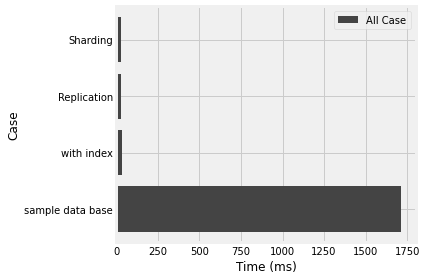

In [2]:
from matplotlib import pyplot as plt
import pandas as pd


plt.style.use("fivethirtyeight")

# time_x = []
q = SQLite()

time_y = [q.select_avg_result("Query 1", "case 1"),
          q.select_avg_result("Query 1", "case 2"),
          q.select_avg_result("Query 1", "case 3"),
          q.select_avg_result("Query 1", "case 4")]
case_x = ["sample data base",
          "with index",
          "Replication",
          "Sharding"]


plt.barh(case_x, time_y, color="#444444", label="All Case")

# # py_dev_y = [45372, 48876, 53850, 57287, 63016,
# #             65998, 70003, 70000, 71496, 75370, 83640]
# # plt.barh(ages_x, py_dev_y, color="#008fd5", label="Python")

# # js_dev_y = [37810, 43515, 46823, 49293, 53437,
# #             56373, 62375, 66674, 68745, 68746, 74583]
# # plt.barh(ages_x, js_dev_y, color="#e5ae38", label="JavaScript")

plt.legend()

# plt.title("Median Salary (USD) by Age")
plt.xlabel("Time (ms)")
plt.ylabel("Case")

plt.tight_layout()

plt.show()


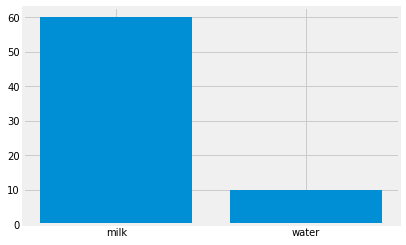

In [3]:
import matplotlib.pyplot as plt

data = {'milk': 60, 'water': 10}
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.show()


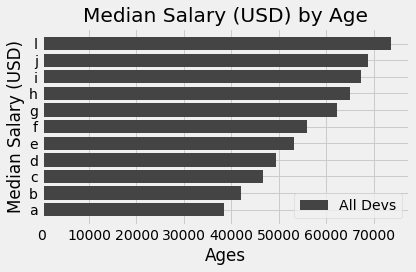

In [4]:
from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight")

ages_x = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "l"]

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]
plt.barh(ages_x, dev_y, color="#444444", label="All Devs")

# py_dev_y = [45372, 48876, 53850, 57287, 63016,
#             65998, 70003, 70000, 71496, 75370, 83640]
# plt.plot(ages_x, py_dev_y, color="#008fd5", label="Python")

# js_dev_y = [37810, 43515, 46823, 49293, 53437,
#             56373, 62375, 66674, 68745, 68746, 74583]
# plt.plot(ages_x, js_dev_y, color="#e5ae38", label="JavaScript")

plt.legend()

plt.title("Median Salary (USD) by Age")
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")

plt.tight_layout()

plt.show()
